# Déploiement ACI (Azure Container Instance)

<img src='https://github.com/retkowsky/images/blob/master/AzureMLservicebanniere.png?raw=true'>

> Documentation: https://docs.microsoft.com/en-us/azure/machine-learning/

## 1. Informations

In [1]:
import sys
print("Python version : ",sys.version)

Python version :  3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]


In [2]:
import datetime
maintenant = datetime.datetime.now()
print(maintenant)

2020-05-13 07:50:19.508144


In [3]:
#Version
import azureml.core
print("Version Azure ML service :", azureml.core.VERSION)

Version Azure ML service : 1.5.0


In [4]:
import azureml.core
from azureml.core.workspace import Workspace
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from azureml.core.model import Model
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from azureml.core import Environment
from azureml.core.model import InferenceConfig

In [5]:
ws = Workspace.from_config()
print(ws.name, ws.resource_group, ws.location, sep='\n')

workshopAML2020
workshopAML2020-rg
westeurope


## 3. Prédiction des prix des biens immobiliers

### Boston dataset example

Feature Descriptions				
1. CRIM - per capita crime rate by town				
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.				
3. INDUS - proportion of non-retail business acres per town.				
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)				
5. NOX - nitric oxides concentration (parts per 10 million)				
6. RM - average number of rooms per dwelling				
7. AGE - proportion of owner-occupied units built prior to 1940				
8. DIS - weighted distances to five Boston employment centres				
9. RAD - index of accessibility to radial highways				
10. TAX - full-value property-tax rate per $10000	

11. PTRATIO - pupil-teacher ratio by town				
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town				
13. LSTAT - pct lower status of the population				
14. MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


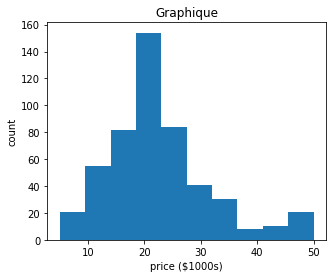

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
boston = load_boston()
plt.figure(figsize=(5, 4))
plt.hist(boston.target)
plt.title('Graphique')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

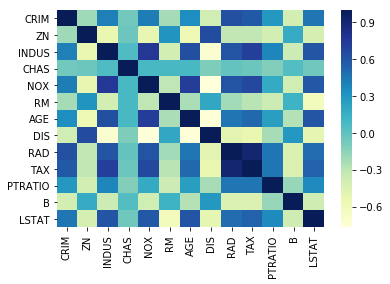

In [10]:
import seaborn as sns
 
boston = load_boston()
boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
correlation_matrix = boston_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

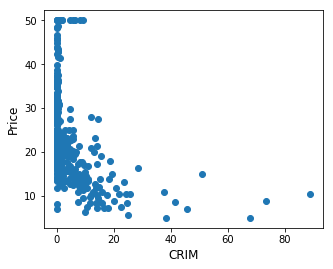

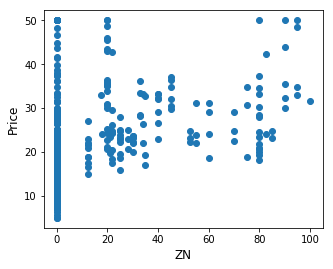

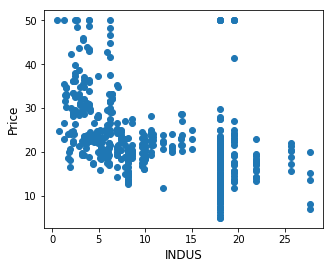

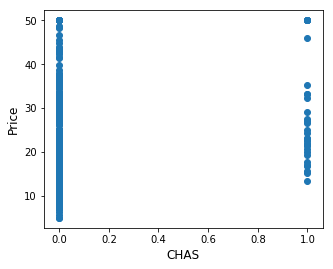

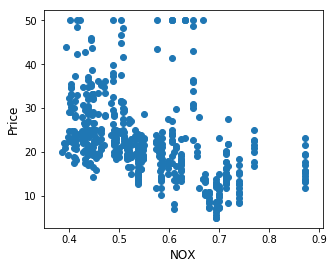

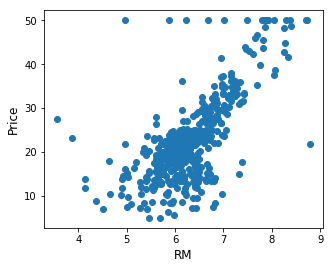

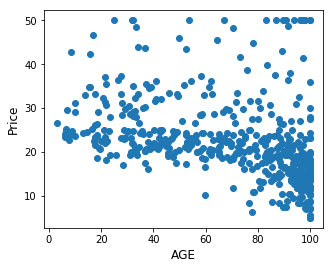

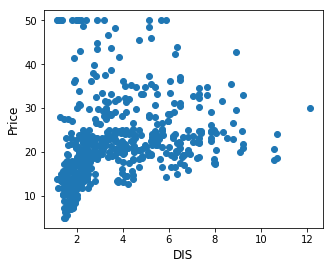

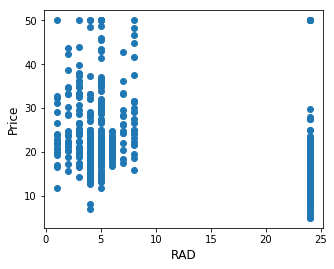

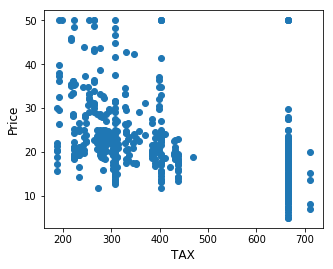

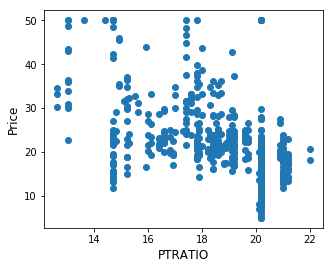

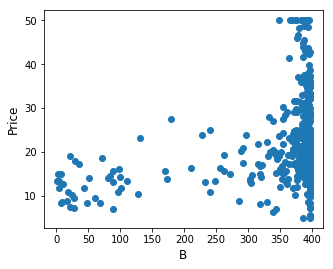

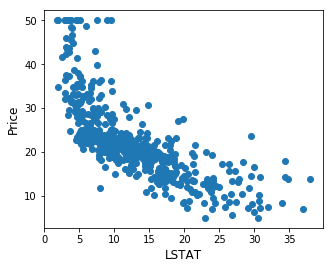

In [11]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [12]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [13]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]


In [15]:
import numpy as np
print('R2 Test =', np.round(lm.score(X_test,Y_test)*100,2))
print('R2 Training =', np.round(lm.score(X_train,Y_train)*100,2))

R2 Test = 69.57
R2 Training = 75.51


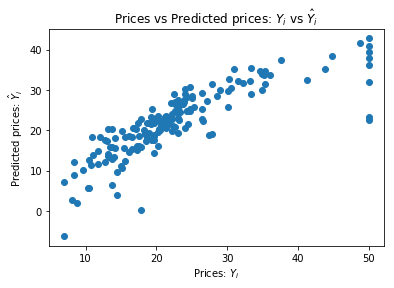

In [16]:
Y_pred = lm.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

### Référencement du modèle de ML

In [17]:
model_file_name = 'boston_model.pkl'
joblib.dump(value = lm, filename = model_file_name)

registered_trained_model = Model.register(workspace=ws, 
                                          model_path=model_file_name, 
                                          model_name=model_file_name, 
                                          description="Modèle Pricing Boston", 
                                          tags = {'algo': "Regression", 'Training context': "Azure ML", 'Framework' : 'scikit-learn'}
                                         )

Registering model boston_model.pkl


In [18]:
print('Nom du modèle :', registered_trained_model.name)

Nom du modèle : boston_model.pkl


In [40]:
print('Description du modèle :', registered_trained_model.description)

Description du modèle : Modèle Pricing Boston


In [41]:
print('Tags du modèle :', registered_trained_model.tags)

Tags du modèle : {'algo': 'Regression', 'Training context': 'Azure ML', 'Framework': 'scikit-learn'}


In [19]:
print('Version du modèle :', registered_trained_model.version)

Version du modèle : 15


In [20]:
from azureml.core import Model

for model in Model.list(ws):
    print(model.name, '- version =', model.version)
    for tag_name in model.tags:
        tag = model.tags[tag_name]
        print ('\t',tag_name, ':', tag)
    for prop_name in model.properties:
        prop = model.properties[prop_name]
        print ('\t',prop_name, ':', prop)
    print('\n')

boston_model.pkl - version = 15
	 algo : Regression
	 Training context : Azure ML
	 Framework : scikit-learn


Exemple10-Modele-TensorFlow - version = 17
	 Framework : TensorFlow
	 Hyperdrive : Oui
	 GPU : Oui


diabetes_model - version = 16
	 Training context : Pipeline


Modele-SKLEARN-Regression - version = 3
	 area : diabetes
	 type : regression
	 format : Scikit-Learn pkl


mybestmodel - version = 6
	 Training context : Azure Auto ML
	 AUC : 0.9993067801973444
	 Accuracy : 0.962881891241127


boston_model.pkl - version = 14
	 algo : Regression
	 Training context : Azure ML
	 Framework : scikit-learn


Exemple3-AutoML-Regression - version = 9
	 Training context : Azure Auto ML
	 R2 : 0.8267547975259869
	 RMSE : 0.08250675651473231


mybestmodel - version = 5
	 Training context : Azure Auto ML
	 AUC : 0.9993067801973444
	 Accuracy : 0.962881891241127


RegressionRidge - version = 7
	 area : Diabetes
	 type : Regression Ridge
	 k : 0.4
	 MSE : 3295.741064355809
	 R2 : 0.3572956390661

	 R2 : 0.8823064055329451
	 RMSE : 0.06954349242467574


Exemple2-AutoML-Classif - version = 1
	 Training context : Azure Auto ML
	 AUC : 0.9992547179382384
	 Accuracy : 0.9646507603948424




## 4. Déploiement Azure Container Instance (ACI)

### 4.1 Création du scoring file

In [21]:
%%writefile scoreboston.py
import pickle
import json
import numpy as np
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from azureml.core.model import Model

from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType

def init():
    global model
    # note here "sklearn_regression_model.pkl" is the name of the model registered under
    # this is a different behavior than before when the code is run locally, even though the code is the same.
    model_path = Model.get_model_path('boston_model.pkl')
    # deserialize the model file back into a sklearn model
    model = joblib.load(model_path)

input_sample = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]])
output_sample = np.array([3726.995])

@input_schema('data', NumpyParameterType(input_sample))
@output_schema(NumpyParameterType(output_sample))
def run(data):
    try:
        result = model.predict(data)
        # you can return any datatype as long as it is JSON-serializable
        return result.tolist()[0]
    except Exception as e:
        error = str(e)
        return error

Overwriting scoreboston.py


In [22]:
%ls scoreboston.py -l

-rwxrwxrwx 1 root root 1208 May 13 07:51 scoreboston.py*


### 4.2 Fichier environnement

In [23]:
%%writefile myenvboston.yml
name: project_environment
dependencies:
  - python=3.6.9
  - pip:
    - azureml-defaults
    - scikit-learn
    - numpy
    - inference-schema[numpy-support]

Overwriting myenvboston.yml


In [24]:
#Viewing the yml file
with open(os.path.join('./myenvboston.yml'), 'r') as f:
    print(f.read())

name: project_environment
dependencies:
  - python=3.6.9
  - pip:
    - azureml-defaults
    - scikit-learn
    - numpy
    - inference-schema[numpy-support]



In [25]:
%ls myenvboston.yml -l

-rwxrwxrwx 1 root root 158 May 13 07:51 myenvboston.yml*


In [26]:
env = Environment.from_conda_specification(name='deploytocloudenv', file_path='myenvboston.yml')
inference_config = InferenceConfig(entry_script="scoreboston.py", environment=env)

### 4.3 Déploiement du modèle
> Prévoir 3 minutes de temps de traitement

Documentation : https://docs.microsoft.com/fr-fr/azure/machine-learning/how-to-deploy-azure-container-instance

In [28]:
%%time
from azureml.core.webservice import AciWebservice, Webservice
from azureml.exceptions import WebserviceException

deployment_config = AciWebservice.deploy_configuration(cpu_cores=1, 
                                                       memory_gb=1,
                                                       auth_enabled=False,
                                                       ssl_enabled=False,
                                                       enable_app_insights=True)

aci_service_name = 'bostonprice'

try:
    service = Webservice(ws, name=aci_service_name)
    if service:
        service.delete()
except WebserviceException as e:
    print()

service = Model.deploy(ws, aci_service_name, [registered_trained_model], inference_config, deployment_config)

service.wait_for_deployment(True)
print(service.state)


Running.......................
Succeeded
ACI service creation operation finished, operation "Succeeded"
Healthy
CPU times: user 214 ms, sys: 35.7 ms, total: 250 ms
Wall time: 2min 30s


> Le endpoint est visible depuis **Azure ML Studio**. <br>
Nous pouvons également visualiser le container créé dans les **resources ACI** du portail Azure.

In [29]:
print("Informations du modèle déployé en ACI :")
print(" - Endpoint :", service.scoring_uri)
print(" - Statut :", service.state)
print(" - Swagger :", service.swagger_uri)

Informations du modèle déployé en ACI :
 - Endpoint : http://02029f93-1272-4591-b48a-7e6d15e1549d.westeurope.azurecontainer.io/score
 - Statut : Healthy
 - Swagger : http://02029f93-1272-4591-b48a-7e6d15e1549d.westeurope.azurecontainer.io/swagger.json


In [30]:
print("Modèles déployés avec Azure ML :")
for webservice_name in ws.webservices:
    print(webservice_name)

Modèles déployés avec Azure ML :
bostonprice
bostonprice-aci
modele-exemple12-aks
my-aks-service-1
drift-aks-service


In [31]:
#print("Logs :")
#print(service.get_logs())

## 5. Test du modèle déployé

> Documentation : https://docs.microsoft.com/fr-fr/azure/machine-learning/how-to-consume-web-service

In [32]:
print("Voici le scoring endpoint: ", service.scoring_uri)

Voici le scoring endpoint:  http://02029f93-1272-4591-b48a-7e6d15e1549d.westeurope.azurecontainer.io/score


### 5.1 Premier test

In [33]:
import json
test1 = json.dumps({'data': [
    [0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]]})

In [34]:
test1

'{"data": [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]]}'

In [35]:
%time
test1encode = bytes(test1, encoding='utf8')

print("Données en entrée : ")
print(test1encode)
prediction1 = service.run(test1encode)
print()
print("=> Prédiction = ", round(prediction1, 5))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs
Données en entrée : 
b'{"data": [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]]}'

=> Prédiction =  30.13748


### 5.2 Second test

In [36]:
import json
test2 = json.dumps({'data': [
    [0.00432,18.0,1.1,0.12,0.422,6.75,65.2,4.0900,1.0,296.0,16.3,496.90,6.8]]})

In [37]:
test2

'{"data": [[0.00432, 18.0, 1.1, 0.12, 0.422, 6.75, 65.2, 4.09, 1.0, 296.0, 16.3, 496.9, 6.8]]}'

In [38]:
%time
test2encode = bytes(test2, encoding='utf8')

print("Données en entrée : ")
print(test2encode)
prediction2 = service.run(input_data=test2encode)
print()
print("=> Prédiction = ", round(prediction2, 5))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs
Données en entrée : 
b'{"data": [[0.00432, 18.0, 1.1, 0.12, 0.422, 6.75, 65.2, 4.09, 1.0, 296.0, 16.3, 496.9, 6.8]]}'

=> Prédiction =  31.82161


## 6. Test avec Postman

https://www.postman.com

### Paramétrage Postman
1. Post : endpoint
2. Content-Type : application/json
3. A spécifier dans le Body :

<img src="https://github.com/retkowsky/images/blob/master/postman1.jpg?raw=true">

## 7. Télémétrie
> Aller ensuite dans **AppInsights** dans le ressource group Azure ML. Bouton **Logs** pour voir les traces.

<img src="https://github.com/retkowsky/images/blob/master/appinsightsaml.jpg?raw=true">

In [ ]:
# Pour supprimer le service
#service.delete()

<img src="https://github.com/retkowsky/images/blob/master/Powered-by-MS-Azure-logo-v2.png?raw=true" height="300" width="300">